# IDC 6940
## Weekly Report 1
### Richard Henry
25-June-2025

In [1]:
# Libraries
import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

### Symbolic Regression
#### Initial Research
This is a machine-learning technique for finding equations to fit data.  The following wikipage piqued the student's interest:

https://en.wikipedia.org/wiki/Symbolic_regression

#### First Toy Dataset
Before we dive into the details, let us build a toy dataset to explain the motivation behind symbolic regression.
##### API Gravity
Convert specific gravity to API Gravity

$\gamma_{API}=\frac{141.5}{\gamma_{o}}-131.5$

|Symbol|Meaning|Units|
|---|---|---|
|$\gamma_{API}$|API Gravity|[degAPI]|
|$\gamma_o$|specific gravity|[1/wtr]|

In [2]:
x=np.arange(start=0.55,stop=1.075,step=0.025)
y=141.5/x-131.5
dfa=pd.DataFrame(data={'Specific Gravity':x,'API Gravity':y})
dfa

,Specific Gravity,API Gravity
0,0.550,125.772727
1,0.575,114.586957
2,0.600,104.333333
3,0.625,94.900000
4,0.650,86.192308
5,0.675,78.129630
6,0.700,70.642857
7,0.725,63.672414
8,0.750,57.166667
9,0.775,51.080645


We now have a dataset consisting of 20 records of two variables.  If we are just interested in predicting the value of one variable from another, then two common tools we can employ are:
- neural network
- linear regression

Let's take a look at the data:

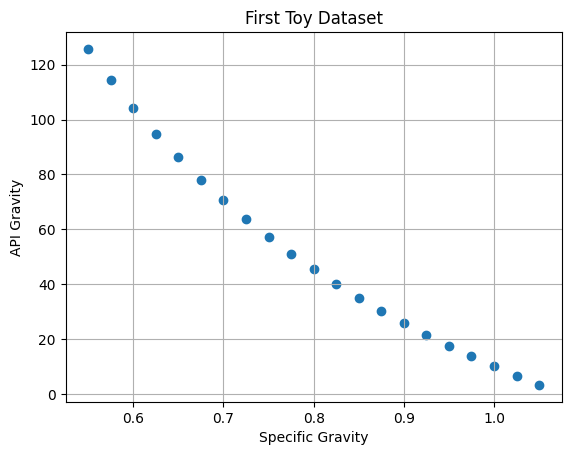

In [3]:
plt.scatter(x,y)
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("First Toy Dataset")
plt.grid()
plt.show()

#### Multiple Regression
When we plot the data, we notice that the relationship is non-linear.  One way to handle this is to *assume* a functional form such as:

$y=a_{3}x^{3}+a_{2}x^{2}+a_{1}x+a_{0}$

and use multiple regression to estimate the values of the constants $a_0...a_3$:

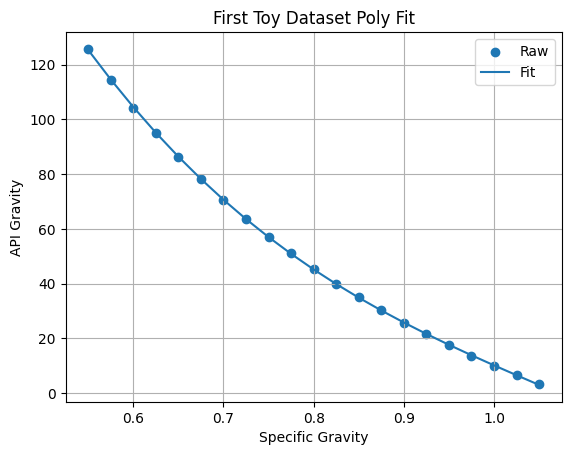

In [4]:
x2=x**2
x3=x**3
dfb=pd.DataFrame(data={'x1':x,'x2':x2,'x3':x3})
mod01=linear_model.LinearRegression()
mod01.fit(dfb,y)
y_fit=mod01.predict(dfb)
plt.scatter(x,y,label="Raw")
plt.plot(x,y_fit,label="Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("First Toy Dataset Poly Fit")
plt.grid()
plt.legend()
plt.show()

In [5]:
print(f"lin (a1): {mod01.coef_[0]:.2f}")
print(f"sqr (a2): {mod01.coef_[1]:.2f}")
print(f"cub (a3): {mod01.coef_[2]:.2f}")
print(f"int (a0): {mod01.intercept_:.2f}")

lin (a1): -1457.03
sqr (a2): 1241.69
cub (a3): -390.67
int (a0): 616.15


In [6]:
# Quick Test
test=mod01.intercept_+mod01.coef_[0]*0.6+mod01.coef_[1]*0.6*0.6+mod01.coef_[2]*0.6*0.6*0.6
print(test)

104.55253068378256


Although this is a very good fit, and therefore we may confidently use this model for predicting values of API gravity for specific gravities in the range $0.55-1.05$, we may be less comfortable using this model for values outside of this range:

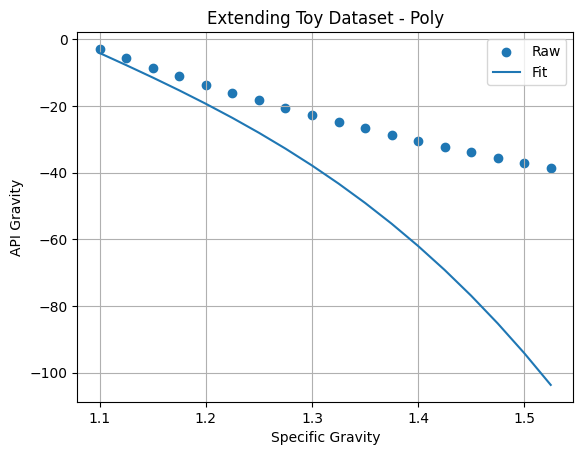

In [7]:
x_big=np.arange(start=1.1,stop=1.55,step=0.025)
y_big=141.5/x_big-131.5
x2_big=x_big**2
x3_big=x_big**3
dfc=pd.DataFrame(data={'x1':x_big,'x2':x2_big,'x3':x3_big})
y_bigfit=mod01.predict(dfc)
plt.scatter(x_big,y_big,label="Raw")
plt.plot(x_big,y_bigfit,label="Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("Extending Toy Dataset - Poly")
plt.grid()
plt.legend()
plt.show()

#### Neural Network
Let us repeat the exercise with a baby ANN:

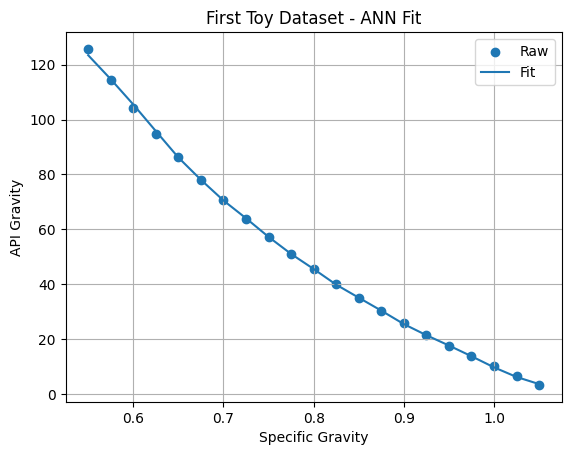

In [8]:
mod02=MLPRegressor(hidden_layer_sizes=(7,21,7),
                   random_state=17,
                   verbose=False,
                   learning_rate_init=0.01,
                   tol=1e-3,
                   max_iter=1500)
mod02.fit(dfb,y)
y_fitann=mod02.predict(dfb)
plt.scatter(x,y,label="Raw")
plt.plot(x,y_fitann,label="Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("First Toy Dataset - ANN Fit")
plt.grid()
plt.legend()
plt.show()

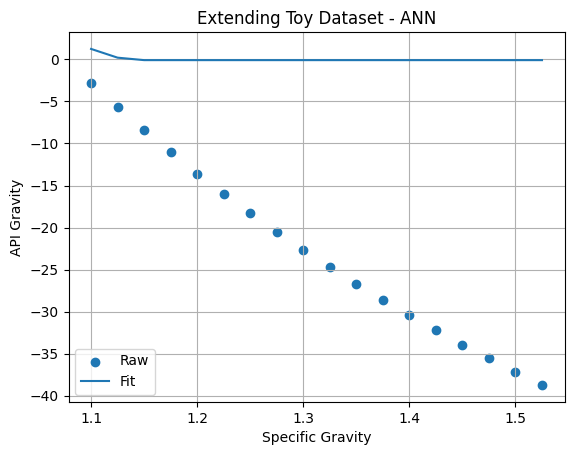

In [9]:
y_bigfitann=mod02.predict(dfc)
plt.scatter(x_big,y_big,label="Raw")
plt.plot(x_big,y_bigfitann,label="Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("Extending Toy Dataset - ANN")
plt.grid()
plt.legend()
plt.show()

Although we can argue that we've overtrained the ANN, the point here is that it predicts garbage outside of its training range.

#### Sparse Regression
One way of to recover the underlying equation is to throw a bunch of possible terms to the regression algorithm:

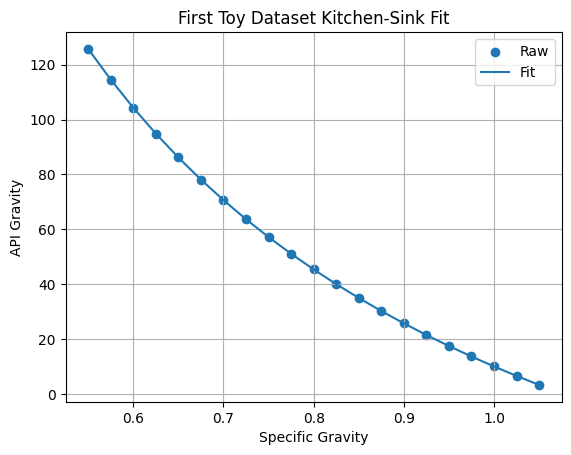

In [10]:
x1=np.reciprocal(x)
xo=np.log(x)
xe=np.exp(x)
dfd=pd.DataFrame(data={'xo':xo,'xe':xe,'x1':x1,'xp':x,'x2':x2,'x3':x3})
mod03=linear_model.LinearRegression()
mod03.fit(dfd,y)
y_fitspa=mod03.predict(dfd)
plt.scatter(x,y,label="Raw")
plt.plot(x,y_fitspa,label="Fit")
plt.xlabel("Specific Gravity")
plt.ylabel("API Gravity")
plt.title("First Toy Dataset Kitchen-Sink Fit")
plt.grid()
plt.legend()
plt.show()

As expected, we have a very good fit, as we have included both the original inverse term $(\frac{1}{x})$ and the terms to make up a cubic equation $(x,x^{2},x^{3})$:

In [11]:
print("log:     ",mod03.coef_[0])
print("exp:     ",mod03.coef_[1])
print("inv:     ",mod03.coef_[2])
print("lin:     ",mod03.coef_[3])
print("sqr:     ",mod03.coef_[4])
print("cub:     ",mod03.coef_[5])
print("int     :",mod03.intercept_)

log:      -3.2805389571047666e-11
exp:      1.7559642628839356e-10
inv:      141.49999999998687
lin:      -2.084519223899406e-10
sqr:      -7.553069281129865e-12
cub:      -7.80318032411742e-11
int     : -131.50000000017013


However, when we look at the *coefficients*, the inverse term is much larger than all the others.  This is the basic idea behind sparse regression.  Notice that the coefficient of the inverse term and the intercept are very close to the original values, so that our regressed equation is:

$y=0.0\cdot log(x)+0.0\cdot e^x+\frac{141.5}{x}+0.0\cdot x +0.0\cdot x^2 +0.0\cdot x^3 -131.5$

At this point, the million dollar question concerns how this regression would have played out if we neglected to add the inverse term.  The polynomial regression earlier provides an answer: The difference in fit quality between `mod01` and `mod03` is negligble, even though the coefficents for the polynomial terms are dramatically different.

Therefore this version of sparse regression has its limitations.

### Tentative Conclusions
1. Uncovering the fundamental relations underlying data can sometimes be critical for making predictions
2. The "kitchen-sink" approach can sometimes work suprisingly well at uncovering fundamental relationships

### Next Steps
We will move from python to R, to:
1. take a first look at library that uses evolutionary algorithm for symbolic regression.